In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('breast-cancer.csv')

# Prepare dataset
X = df.drop(columns=["id", "diagnosis"])
y = LabelEncoder().fit_transform(df["diagnosis"])  # M=1, B=0

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [3]:
# --- Train Linear SVM ---
svm_linear = SVC(kernel="linear", C=1, random_state=42)
svm_linear.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [4]:
# --- Train RBF SVM ---
svm_rbf = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm_rbf.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [6]:
# --- Cross-validation performance ---
linear_cv = cross_val_score(svm_linear, X_scaled, y, cv=5).mean()
rbf_cv = cross_val_score(svm_rbf, X_scaled, y, cv=5).mean()

linear_cv, rbf_cv

(np.float64(0.9701443875174661), np.float64(0.9736376339077782))

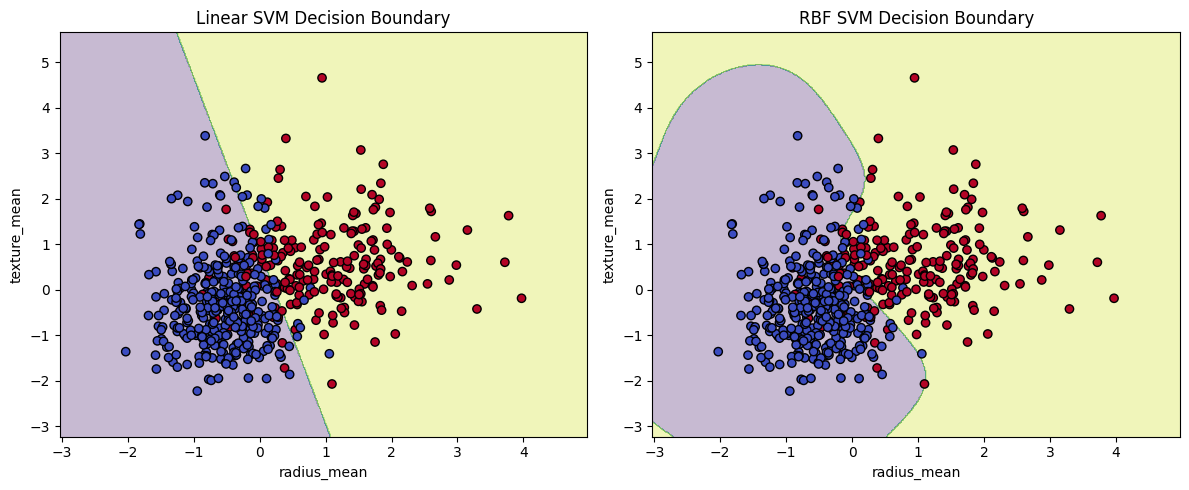

In [7]:
# --- Step 1: Decision Boundary Visualization with 2 features ---

# Pick two features for visualization
feat1, feat2 = "radius_mean", "texture_mean"
X_vis = df[[feat1, feat2]]
X_vis_scaled = scaler.fit_transform(X_vis)

# Train SVMs on only 2 features (for visualization)
svm_linear_vis = SVC(kernel="linear", C=1)
svm_linear_vis.fit(X_vis_scaled, y)

svm_rbf_vis = SVC(kernel="rbf", C=1, gamma="scale")
svm_rbf_vis.fit(X_vis_scaled, y)

# Create meshgrid
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict for each model
Z_linear = svm_linear_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_rbf = svm_rbf_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Linear
axes[0].contourf(xx, yy, Z_linear, alpha=0.3)
axes[0].scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y, cmap="coolwarm", edgecolors="k")
axes[0].set_title("Linear SVM Decision Boundary")
axes[0].set_xlabel(feat1)
axes[0].set_ylabel(feat2)

# RBF
axes[1].contourf(xx, yy, Z_rbf, alpha=0.3)
axes[1].scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y, cmap="coolwarm", edgecolors="k")
axes[1].set_title("RBF SVM Decision Boundary")
axes[1].set_xlabel(feat1)
axes[1].set_ylabel(feat2)

plt.tight_layout()
plt.show()

In [8]:
# --- Step 2: Hyperparameter Tuning with GridSearchCV ---
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", 0.01, 0.1, 1, 10]
}

grid = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_scaled, y)

best_params = grid.best_params_
best_score = grid.best_score_

best_params, best_score

({'C': 10, 'gamma': 0.01}, np.float64(0.9789318428815401))